# Exporting data using EarthEngineExporter

**Author**: Ivan Zvonkov

There are two common reasons to use CropHarvest's EarthEngineExporter:
1. To export data in the same style as the CropHarvest dataset for a particular area of interest (can be useful if testing a model trained using CropHarvest)
2. To export data for labels not in the default CropHarvest labels (can be useful for labels that can't be added to CropHarvest due to privacy concerns)

This notebook will demonstrate how to do both of the above tasks.

In [1]:
from cropharvest.eo import EarthEngineExporter
from cropharvest.countries import BBox
from datetime import date
import pandas as pd

In [2]:
# Exports can be done to Google Drive or Google Cloud
google_drive_exporter = EarthEngineExporter()
google_cloud_exporter = EarthEngineExporter(dest_bucket="cropharvest")

Loading Earth Engine tasks: 100%|███████████| 29/29 [00:00<00:00, 197139.09it/s]


## 1. Exporting an area of interest

In [3]:
# By default data will be exported to Google Drive
google_drive_exporter.export_for_bbox(
    bbox=BBox(min_lon=16.43, max_lon=16.45, min_lat=-18.71, max_lat=-18.69),
    bbox_name="Etosha_Pan",
    start_date=date(2020, 1, 1),
    end_date=date(2021, 1, 1),
)

A single patch (metres_per_patch=10000) is bigger than the requested bounding box.
Splitting into 1 columns and 1 rows


{'batch_0/0': True}

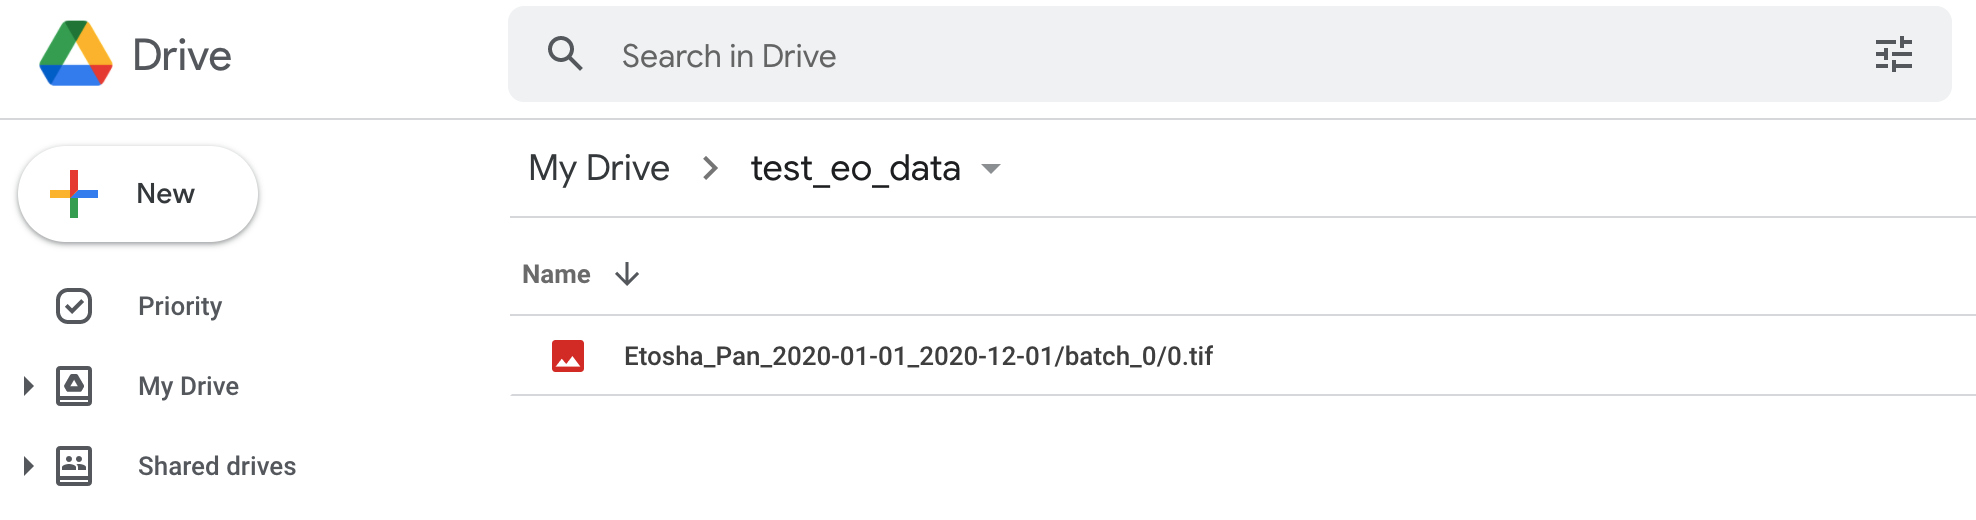

In [4]:
# Data can also be exported to Google Cloud Bucket
google_cloud_exporter.export_for_bbox(
    bbox=BBox(min_lon=16.43, max_lon=16.45, min_lat=-18.71, max_lat=-18.69),
    bbox_name="Etosha_Pan",
    start_date=date(2020, 1, 1),
    end_date=date(2020, 12, 1),
)

A single patch (metres_per_patch=10000) is bigger than the requested bounding box.
Splitting into 1 columns and 1 rows


{'batch_0/0': True}

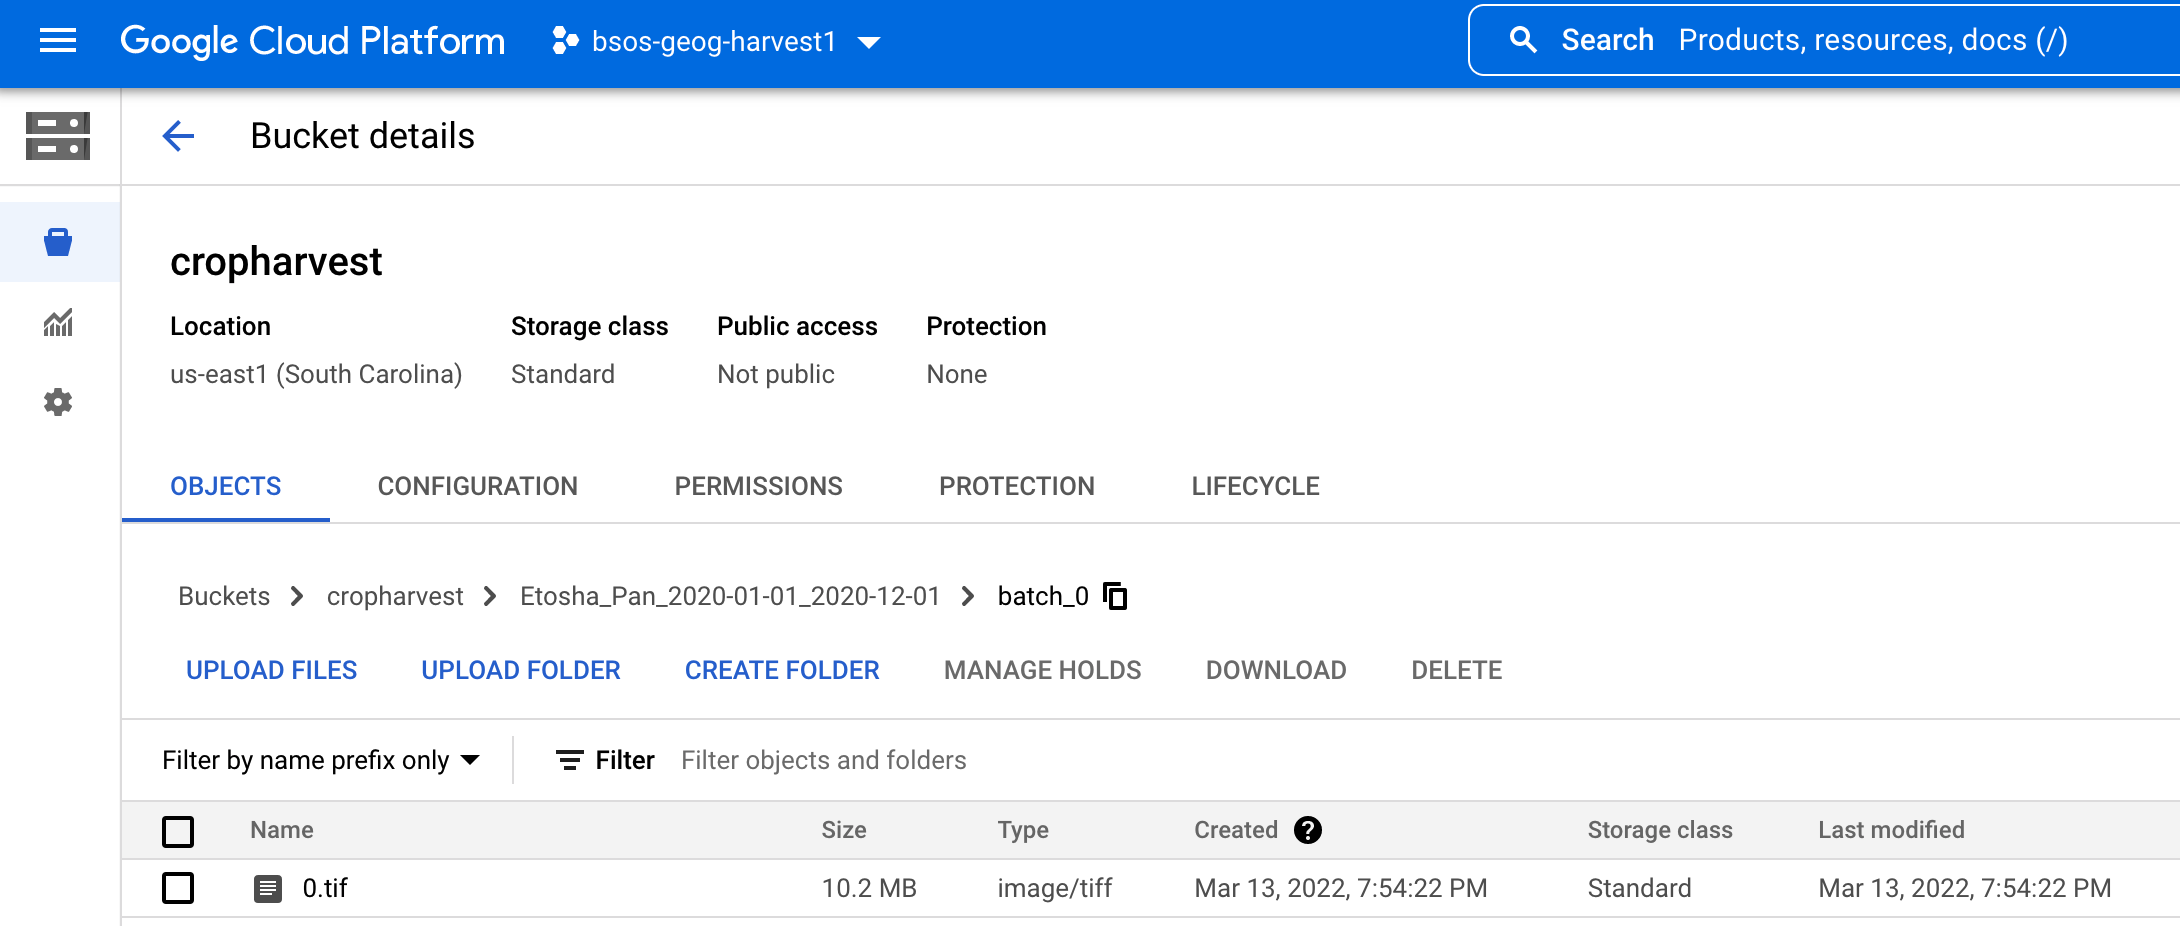

# 2. Exporting data for labels not in CropHarvest

In [5]:
private_labels = pd.DataFrame(
    {
        "lon": [16.44, 16.49],
        "lat": [-18.70, -18.73],
        "start_date": [date(2020, 1, 1), date(2020, 1, 1)],
        "end_date": [date(2021, 1, 1), date(2021, 1, 1)],
        "is_crop": [False, False],
    }
)
private_labels

,lon,lat,start_date,end_date,is_crop
0,16.44,-18.70,2020-01-01,2021-01-01,False
1,16.49,-18.73,2020-01-01,2021-01-01,False


In [6]:
google_drive_exporter.export_for_labels(labels=private_labels)

No explicit export_identifier in labels. One will be constructed during export
Exporting 2 labels


2it [00:00, 1392.53it/s]
Exporting:: 100%|█████████████████████████████████| 2/2 [00:01<00:00,  1.20it/s]


Exported to a folder marked with the date of export
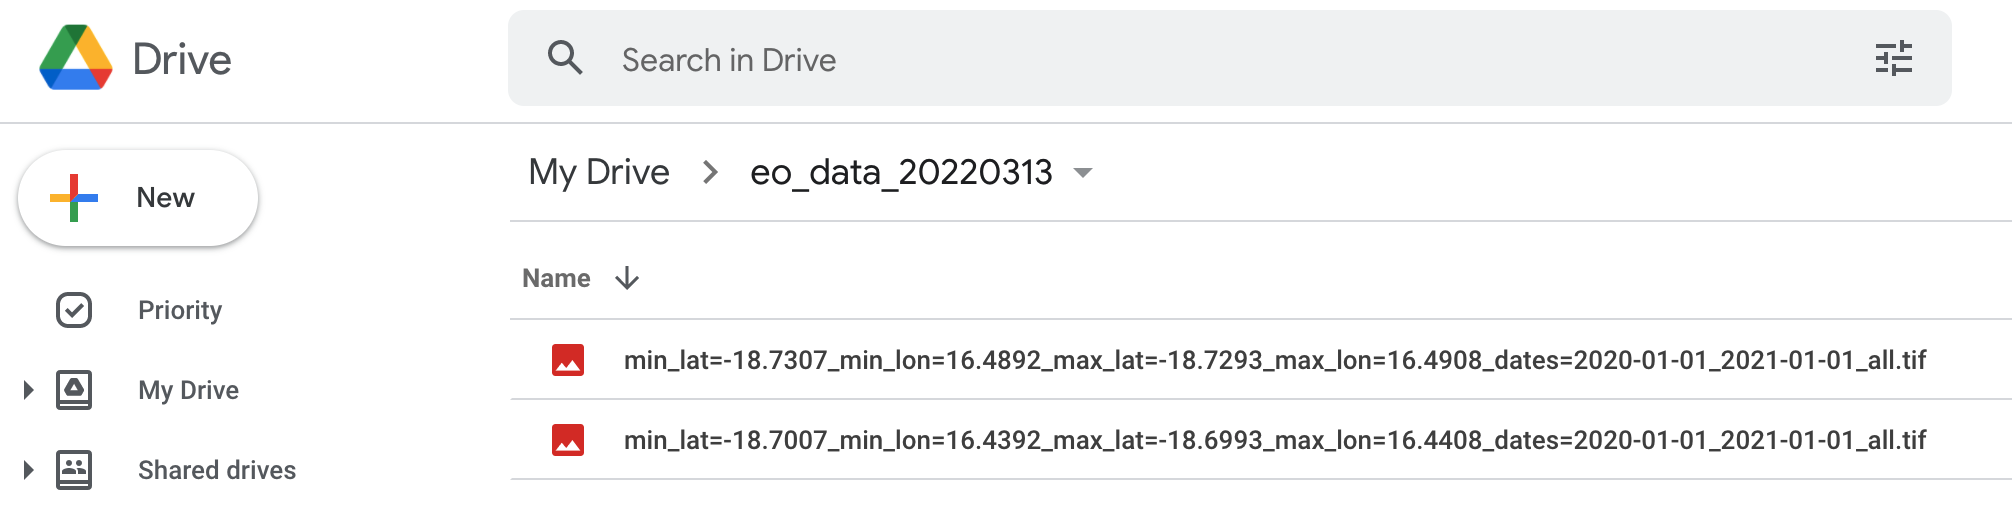

In [7]:
google_cloud_exporter.export_for_labels(labels=private_labels)

No explicit export_identifier in labels. One will be constructed during export
Exporting 2 labels


2it [00:00, 1107.99it/s]
Exporting:: 100%|██████████████████████████████| 2/2 [00:00<00:00, 13005.59it/s]


Exported to a tifs folder to keep them separate from other items in the bucket
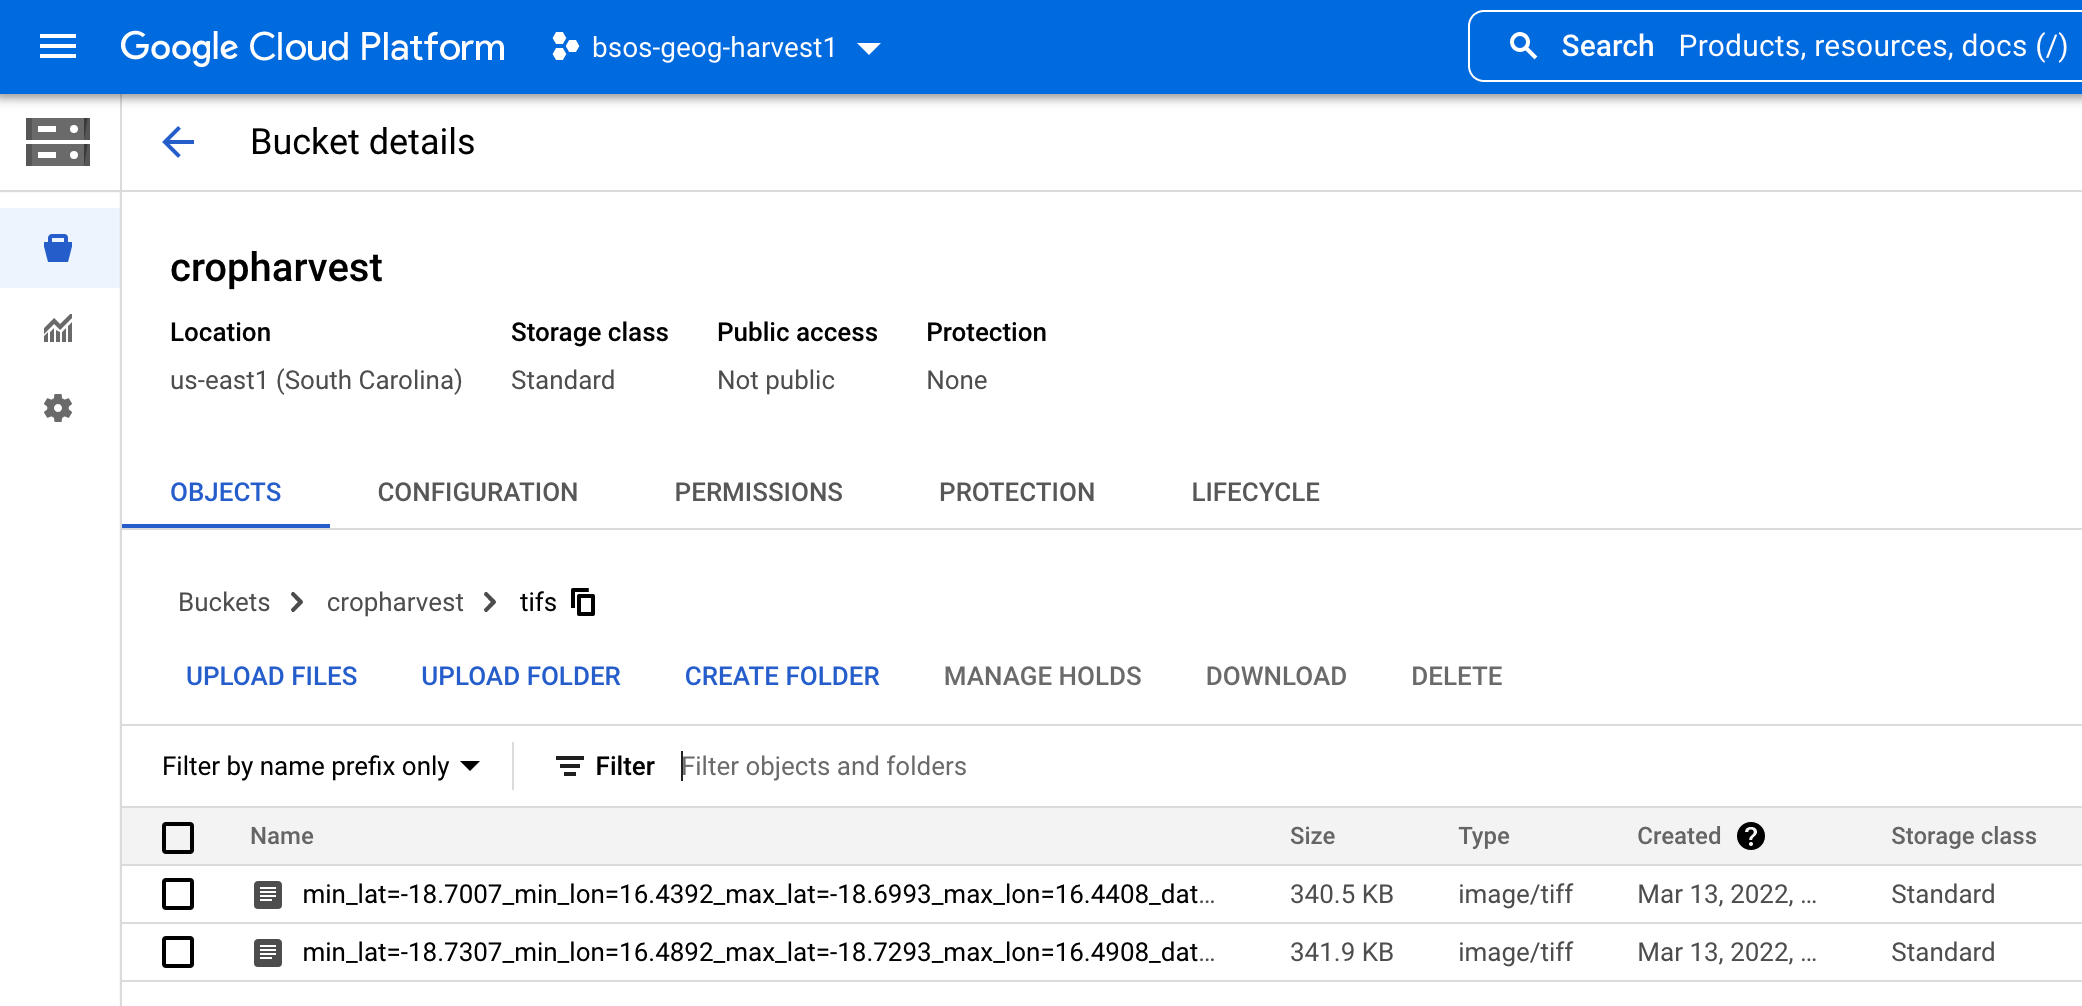